*# OBJETIVO: Predecir cual es el descuento Optimo para Generar ganancias Positivas*
En este data set se describen las ventas de un comercio por producto categoría, grupo de cliente y región, con esto se desea buscar cuales son los clientes a cual apuntar sus estrategias y que grupo de articulos mejorar y/o ofrecer, ademas su pronostico de demanda para mejorar su participación dentro del mercado y a su vez mejorar las ganancias

**A continuación describiremos a que refiere cada columna**

Row ID ->Identificador único para cada fila.
Order ID ->ID de pedido único para cada cliente.
Order Date ->Fecha de pedido del producto.
Ship Date ->Fecha de envío del producto.
Ship Mode->Modo de envío especificado por el Cliente.
Customer ID ->ID único para identificar a cada Cliente.
Customer Name ->Nombre del cliente.
Segment ->El segmento al que pertenece el Cliente.
Country ->País de residencia del Cliente.
City ->Ciudad de residencia del Cliente.
State ->Estado de residencia del Cliente.
Postal Code ->Código Postal de cada Cliente.
Region ->Región a la que pertenece el Cliente.
Product ID ->ID único del producto.
Category ->Categoría del producto solicitado.
Sub-Category ->Subcategoría del producto solicitado.
Product Name ->Nombre del producto
Sales ->Ventas del producto.
Quantity ->Cantidad del producto.
Discount ->Descuento proporcionado.
Profit ->Ganancias/Pérdidas incurridas.

In [1]:
#Importamos las librerias que comenzaremos a aplicar para el análisis
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Procedo a cargar el archivo como Data Frame
URL = r'C:\Users\yusle\OneDrive\Escritorio\Python\Proyecto Data Ciencie I\Sample - Superstore.csv'
df = pd.read_csv(URL, sep=',', encoding='ISO-8859-1')

#Exploramos Las Primeras Filas del Archivo
print('Vista de las Primeras Líneas del Data Frame')
df.head()

Vista de las Primeras Líneas del Data Frame


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Exploramos los datos

In [2]:
#Exploramos la cantidad de Filas y Columnas del Archivo
print('Cantidad de Filas y Columnas: ')
print(df.shape)

Cantidad de Filas y Columnas: 
(9994, 21)


In [3]:
print('Resumen General de la Estructura de los Datos')
print(df.info())

Resumen General de la Estructura de los Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales 

Análisis de esta Estructura de datos

Número total de filas y columnas:
Filas: El DataFrame tiene 9994 entradas, lo que significa que contiene 9994 filas de datos enumeradas desde el 0 al 9993.
Columnas: Hay un total de 21 columnas.

Resumen de las columnas:
El DataFrame contiene 21 columnas con diferentes tipos de datos.

Tipos de datos de las columnas:
3 columnas de tipo int64 (números enteros de 64 bits):
"Row ID"
"Postal Code"
"Quantity"

3 columnas de tipo float64 (números decimales de 64 bits):
"Sales"
"Discount"
"Profit"

15 columnas de tipo object (generalmente texto):
Estas incluyen identificadores, fechas en formato de texto, nombres, categorías y otras descripciones textuales como "Order ID", "Order Date", "Ship Date", "Customer Name", "City", "Product Name", entre otras.

Valores no nulos:
Todas las columnas tienen 9994 valores no nulos, lo que indica que no hay valores faltantes en ninguna columna.

Uso de memoria:
El DataFrame ocupa aproximadamente 1.6 MB de memoria, lo cual es relativamente ligero para 9994 filas y 21 columnas.

Columnas clave:
"Row ID" es un identificador único para cada fila.

"Order Date" y "Ship Date" están actualmente en formato de texto (object), pero podrían convertirse a formato datetime para facilitar el análisis basado en fechas.

"Sales", "Quantity", "Discount" y "Profit" son variables numéricas que pueden ser importantes para análisis.





In [4]:
#Convertimos las columnas "Order Date" y "Ship Date" en formato Fecha
df['Order Date'] = pd.to_datetime (df['Order Date'] )
df['Ship Date'] = pd.to_datetime (df['Ship Date'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
print('Exploramos las estadísticas de los Datos')
print(df[['Sales', 'Profit', 'Quantity', 'Discount']].describe())

Exploramos las estadísticas de los Datos
              Sales       Profit     Quantity     Discount
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     3.789574     0.156203
std      623.245101   234.260108     2.225110     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.280000     1.728750     2.000000     0.000000
50%       54.490000     8.666500     3.000000     0.200000
75%      209.940000    29.364000     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000


In [6]:
#Exploramos los datos Nulos
print(' Columnas: ')
df.isnull().sum()

 Columnas: 


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Como ya vimos anteriormente en el detalle del DF no hay valores nulos en ninguna columna

Las Variable Target Será la Ganancia donde queremos ver como inciden los descuentos en las mismas para tomar la mejor desición en los planes de venta con mejor resultado

Por ende vamos a ver la correlación de las variables

In [7]:
#Calculamos la Matriz de Correlación para los Datos
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


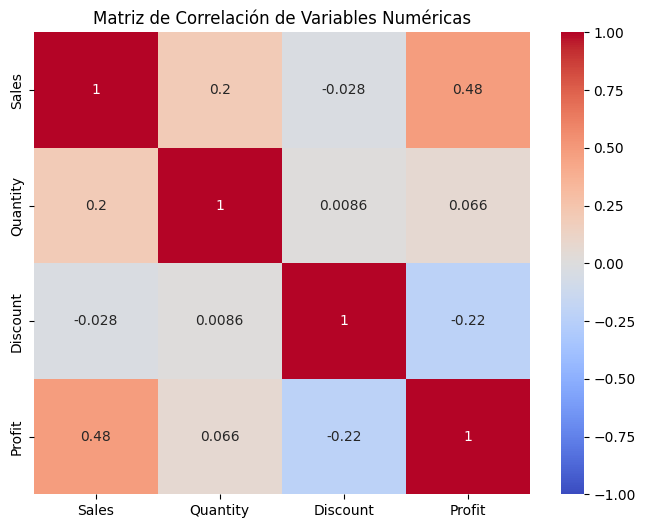

In [8]:
# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Explicación variable por variable:

**Ventas:**
Sales - Sales: La correlación es 1, porque una variable siempre está perfectamente correlacionada consigo misma.
Sales - Quantity: Correlación de 0.2008: Hay una leve correlación positiva entre ventas y cantidad. Esto significa que, en general, cuando se vende más cantidad, el valor de las ventas tiende a aumentar, pero no de manera muy fuerte.
Sales - Discount: Correlación de -0.0282: No hay prácticamente ninguna relación entre ventas y descuento. El descuento no parece influir mucho en el valor total de las ventas.
Sales - Profit: Correlación de 0.4791: Existe una correlación moderada positiva entre las ventas y las ganancias, lo que indica que, en promedio, cuando las ventas aumentan, las ganancias también tienden a aumentar, pero no necesariamente de manera proporcional.

**Cantidad:**
Quantity - Quantity: Correlación de 1, lo cual es esperable.
Quantity - Discount: Correlación de 0.0086: No hay prácticamente relación entre la cantidad vendida y el descuento aplicado. Esto sugiere que los descuentos no tienen un impacto considerable en la cantidad de productos vendidos.
Quantity - Profit: Correlación de 0.0663: Muy baja correlación positiva entre la cantidad vendida y las ganancias, lo que indica que la cantidad de unidades vendidas no tiene una gran influencia en las ganancias.

**Descuento:**
Discount - Discount: Correlación perfecta de 1.
Discount - Profit: Correlación de -0.2195: Aquí vemos una correlación negativa, lo que significa que, a mayor descuento, menor es la ganancia. Este resultado tiene sentido, ya que aplicar descuentos reduce el margen de beneficio.


**Ganancia:**
Profit - Profit: Correlación de 1, como es natural.
Profit tiene una correlación positiva con Sales (0.4791) y muy baja correlación con Quantity (0.0663), pero una correlación negativa con Discount (-0.2195), lo que indica que los descuentos reducen las ganancias de forma notable.


**Conclusiones:**
Las ventas y las ganancias están moderadamente correlacionadas.
Los descuentos reducen significativamente las ganancias, como era de esperarse.
Las ventas no están muy influenciadas por la cantidad ni por los descuentos.
La cantidad vendida tiene poca correlación con las demás variables, lo que sugiere que es una variable menos determinante en la relación de ventas y ganancias.
Esto sugiere que la gestión de descuentos debe ser cuidadosa, ya que aunque podrían no incrementar drásticamente las ventas, sí disminuyen las ganancias.

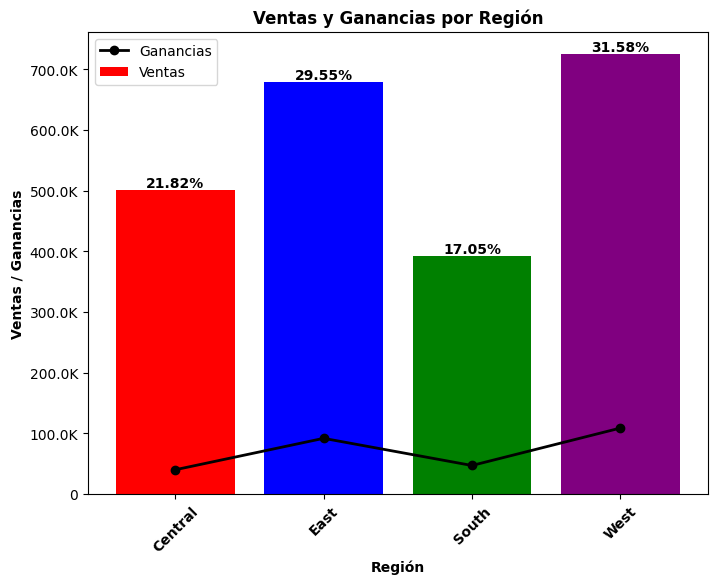

In [19]:
#Comenzamos a Levantar algunos gráficos para Analizar algunas variables importantes

#Veamos las Ventas y Ganancias Totales por Región
from matplotlib.ticker import FuncFormatter

# Función para formatear los números en K (miles) y M (millones)
def format_sales(value, tick_number):
    if value >= 1_000_000:  # Si el valor es mayor o igual a 1 millón
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:  # Si el valor es mayor o igual a 1 mil
        return f'{value / 1_000:.1f}K'
    else:  # Para valores menores a 1 mil
        return f'{value:.0f}'  # Mostrar el valor sin modificar

# Agrupar las ventas y las ganancias por región
region_sales = df.groupby('Region')['Sales'].sum()
region_profit = df.groupby('Region')['Profit'].sum()

# Calcular el porcentaje de ventas por cada región sobre el total
total_sales = region_sales.sum()
percentages = (region_sales / total_sales) * 100

# Crear gráfico de barras con colores específicos para cada barra
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple']  # Colores personalizados para las barras

# Crear el gráfico con las barras de ventas
bars = plt.bar(region_sales.index, region_sales.values, color=colors, label='Ventas')

# Añadir el porcentaje encima de cada barra
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()  # Altura de la barra (el valor de las ventas por región)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', 
             ha='center', va='bottom', fontweight='bold')

# Agregar una línea de ganancias por región
plt.plot(region_profit.index, region_profit.values, color='Black', marker='o', linewidth=2, label='Ganancias')

# Añadir título y etiquetas en negrita
plt.title('Ventas y Ganancias por Región', fontweight='bold')
plt.xlabel('Región', fontweight='bold')
plt.ylabel('Ventas / Ganancias', fontweight='bold')

# Aplicar formateador de ejes para mostrar ventas en K y M
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_sales))


# Rotar las etiquetas del eje x
plt.xticks(rotation=45, fontweight='bold')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

La región con mayor venta es la zona este con 31,58%, sguida por la zona Este de cerca con 29,55%, la zona central concentra el 21,82% mientras que la sur con la menor venta contiene el 17,05% del total del periodo de venta analizado

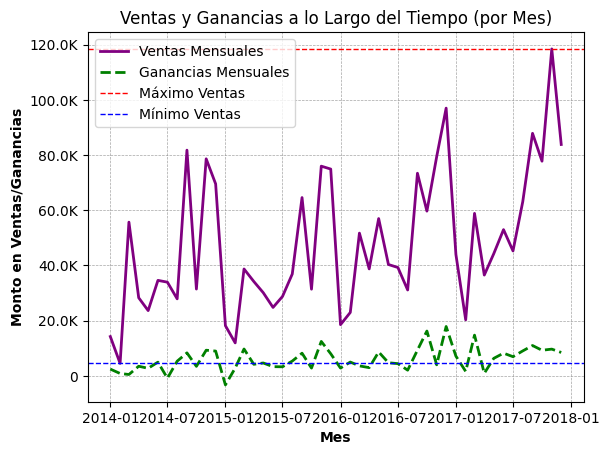

In [20]:
#Evolución de Ventas y Ganancias por mes


# Función para formatear los números en K (miles) y M (millones)
def format_sales(value, tick_number):
    if value >= 1_000_000:  # Si el valor es mayor o igual a 1 millón
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:  # Si el valor es mayor o igual a 1 mil
        return f'{value / 1_000:.1f}K'
    else:  # Para valores menores a 1 mil
        return f'{value:.0f}'  # Mostrar el valor sin modificar


#Definimos las ventas ypor mes
df['Month'] = df['Order Date'].dt.to_period('M')

# Agrupar las ventas y ganancias por mes
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_profit = df.groupby('Month')['Profit'].sum()

# Convertir los índices a un formato de fecha adecuado para matplotlib
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_profit.index = monthly_profit.index.to_timestamp()

# Encontrar los puntos máximos y mínimos
max_sales = monthly_sales.max()
min_sales = monthly_sales.min()
max_month_sales = monthly_sales.idxmax()
min_month_sales = monthly_sales.idxmin()

# Línea de ventas mensuales
plt.plot(monthly_sales.index, monthly_sales.values, color='purple', linewidth=2, label='Ventas Mensuales')

# Línea de ganancias mensuales
plt.plot(monthly_profit.index, monthly_profit.values, color='green', linewidth=2, linestyle='--', label='Ganancias Mensuales')

# Agregar líneas punteadas en los puntos máximos y mínimos de ventas
plt.axhline(y=max_sales, color='red', linestyle='--', linewidth=1, label='Máximo Ventas')
plt.axhline(y=min_sales, color='blue', linestyle='--', linewidth=1, label='Mínimo Ventas')

# Personalización del gráfico
plt.title('Ventas y Ganancias a lo Largo del Tiempo (por Mes)')
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Monto en Ventas/Ganancias', fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.legend()

# Aplicar formateador de ejes para mostrar ventas en K y M
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_sales))

plt.show()

En el gráfico se puede observar que los meses donde la venta se acerca al mínimo son los primeros de cada año teniendo alli su punto mínimo, al contrario de la venta máxima que se concentra en los últimos meses de cada año, teniendo allí sus picos máximos de venta, en el caso de las ganancias tienen sus picos negativos cuando la venta los es más baja.

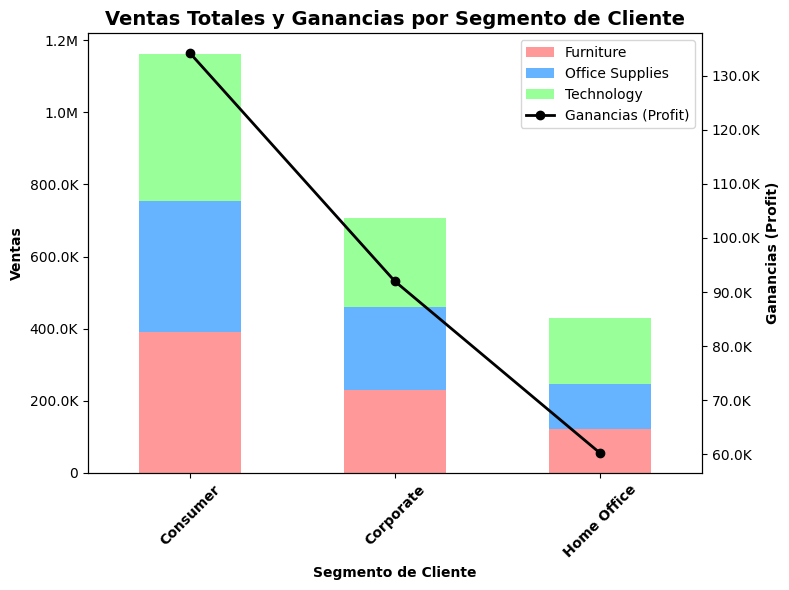

In [21]:
#Ventas y Ganancoas por Categoría y Segmento de clientes


# Función para formatear los números en K (miles) y M (millones)
def format_sales(value, tick_number):
    if value >= 1_000_000:  # Si el valor es mayor o igual a 1 millón
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:  # Si el valor es mayor o igual a 1 mil
        return f'{value / 1_000:.1f}K'
    else:  # Para valores menores a 1 mil
        return f'{value:.0f}'  # Mostrar el valor sin modificar

# Agrupar las ventas por segmento de cliente y categoría
sales_by_segment_category = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()

# Agrupar las ganancias (Profit) por segmento de cliente
profit_by_segment = df.groupby('Segment')['Profit'].sum()

# Crear gráfico de barras apiladas para Ventas
fig, ax1 = plt.subplots(figsize=(8,6))
sales_by_segment_category.plot(kind='bar', stacked=True, ax=ax1, color=['#FF9999', '#66B3FF', '#99FF99'], legend=False)

# Configurar título y etiquetas de eje
ax1.set_title('Ventas Totales y Ganancias por Segmento de Cliente', fontsize=14, fontweight='bold')
ax1.set_xlabel('Segmento de Cliente', fontweight='bold')
ax1.set_ylabel('Ventas', fontweight='bold')

# Aplicar formateador de ejes para mostrar ventas en K y M
ax1.yaxis.set_major_formatter(FuncFormatter(format_sales))

# Rotar etiquetas del eje x
plt.xticks(rotation=45, fontweight='bold')

# Crear segundo eje para mostrar las ganancias (Profit)
ax2 = ax1.twinx()  # Crear un segundo eje y para el mismo gráfico
ax2.plot(profit_by_segment.index, profit_by_segment.values, color='black', marker='o', linewidth=2, label='Ganancias (Profit)')

# Etiquetas y formateo del eje para Profit
ax2.set_ylabel('Ganancias (Profit)', fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Aplicar el formateador FuncFormatter para el eje de Profit
ax2.yaxis.set_major_formatter(FuncFormatter(format_sales))

# Mostrar leyenda combinada en la parte superior derecha
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El segmento de clientes con mayor compra es el consumidor final, donde los elementos de oficina representan la mayor venta muy seguido por tecnología, el segun segmento es el corporativo con una distribución mas uniforme entre las categorías de artículos, finalmente home office con mayor volumen en elementos de oficina.

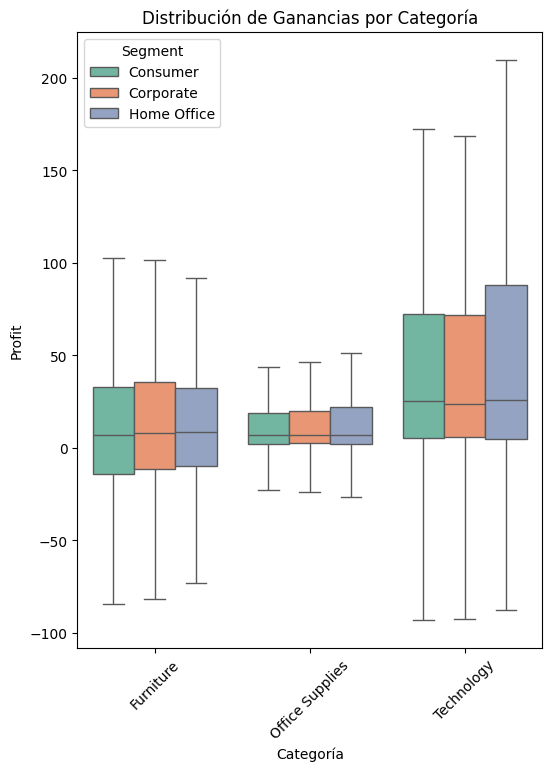

In [22]:
#Gráfico de cajas (boxplot) para ver la distribución de las ventas por categoría

#outline=false
# Crear el boxplot
plt.figure(figsize=(6, 8))

sns.boxplot(x='Category', y='Profit', hue ='Segment', data=df, palette='Set2', showfliers=False )
plt.title('Distribución de Ganancias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Profit')
plt.xticks(rotation=45)

plt.show()



La mediana de las ganancias en el caso de furniture es bastante simetrica, para el caso de office supply y tecnology indica que la distribución de los datos es asimétrica positiva, con una mayor concentración de valores en el extremo inferior y algunos outliers en el extremo superior que están influyendo en la media. Esto sugiere que la mayoría de los segmentos presentan ganancias más bajas, mientras que unos pocos generan ganancias significativamente altas.
La variabilidad de las ganancias dentro de cada segmento (longitud de las cajas).
La variabilidad de ganancias en mucho mayor en tecnology, para office supply es un rango bastante acotado, mientras que en furniture sigue siendo una relación simetrica



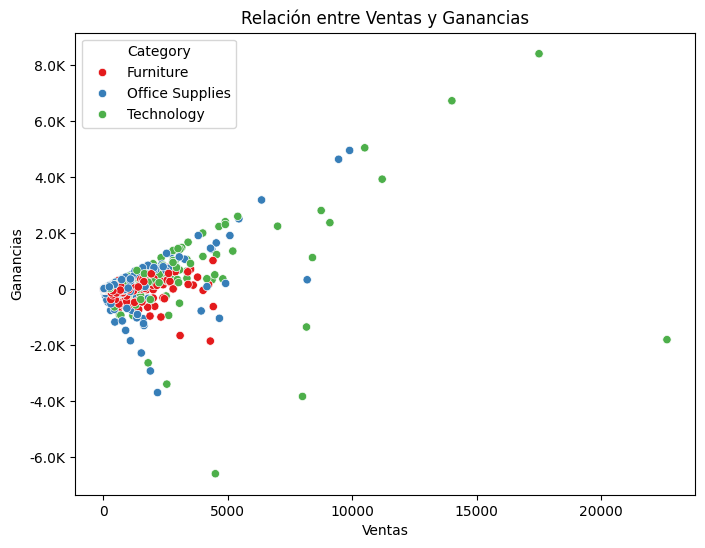

In [25]:
# Crear scatter plot para ver la relación entre ventas y ganancias
#Nota Podemos aplicar escala logaritmica para achicar mejor escala
#o podemos filtrar ventas>a X cantidad

def format_sales(value, tick_number):
    if value >= 1_000_000 or value <= -1_000_000:  # Valores positivos o negativos en millones
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000 or value <= -1_000:  # Valores positivos o negativos en miles
        return f'{value / 1_000:.1f}K'
    else:  # Para valores menores a mil y mayores que -1 mil
        return f'{value:.0f}'  # Mostrar el valor sin modificar
    
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', palette='Set1')
plt.title('Relación entre Ventas y Ganancias')
plt.xlabel('Ventas')
plt.ylabel('Ganancias')

# Aplicar el formateador FuncFormatter para el eje de Profit
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_sales))
plt.show()

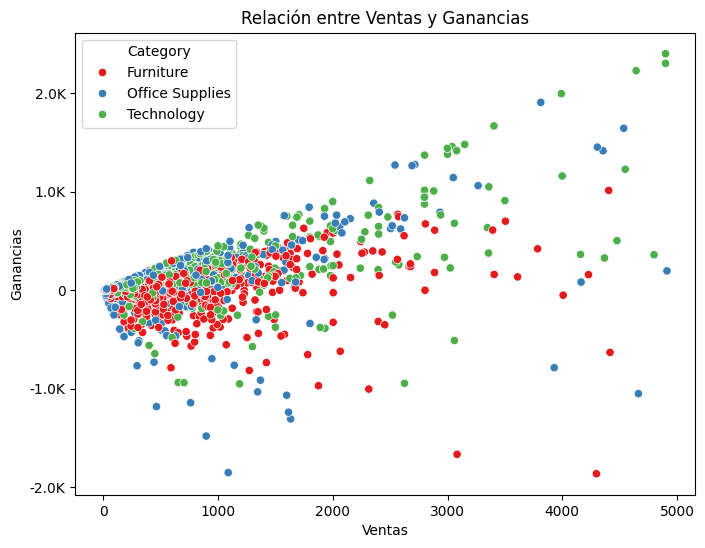

In [26]:
#Vamos a generar un filtrado en este gráfico en las ventas para ver mejor la escala de la relación

#Creamos DF ventas mayor a 5000 y Ganancia mayor a -2000
df_filtrado_ventas =df[(df['Sales'] < 5000) & (df['Profit'] > -2000)]

def format_sales(value, tick_number):
    if value >= 1_000_000 or value <= -1_000_000:  # Valores positivos o negativos en millones
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000 or value <= -1_000:  # Valores positivos o negativos en miles
        return f'{value / 1_000:.1f}K'
    else:  # Para valores menores a mil y mayores que -1 mil
        return f'{value:.0f}'  # Mostrar el valor sin modificar

#Volvemos a generar el Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df_filtrado_ventas, hue='Category', palette='Set1')
plt.title('Relación entre Ventas y Ganancias')
plt.xlabel('Ventas')
plt.ylabel('Ganancias')

# Aplicar el formateador FuncFormatter para el eje de Profit
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_sales))
plt.show()


Para el caso de los productos tencnologicos hay una relación entre ventas y ganancias, sin embargo hay que analizar los casos donde la ganancia es negativa para definir si hubo descuentos que impactaran el resultado.
La misma tendencia se puede observar ligeramente en office supplies
La categoriade furniture no tiene una relación lineal entre ambas, hay que estudiar a fondo que esta impactando esta categoría

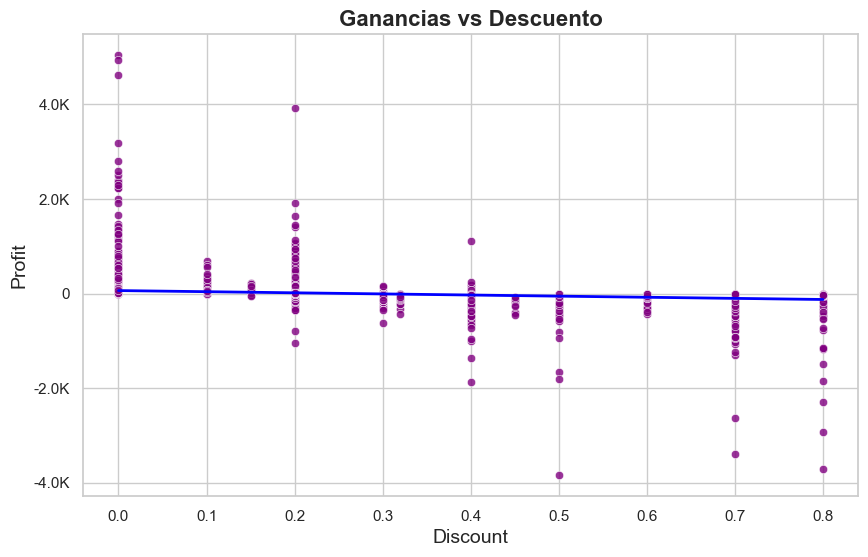

In [27]:
#Ganancia Vs Decuento
# Configurar el estilo de Seaborn
df_filtrado_ventas =df[(df['Sales'] < 5000) & (df['Profit'] > -2000)]

def format_sales(value, tick_number):
    if value >= 1_000_000 or value <= -1_000_000:  # Valores positivos o negativos en millones
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000 or value <= -1_000:  # Valores positivos o negativos en miles
        return f'{value / 1_000:.1f}K'
    else:  # Para valores menores a mil y mayores que -1 mil
        return f'{value:.0f}'  # Mostrar el valor sin modificar

sns.set(style="whitegrid")

df_filtrado_profit = df[(df['Profit'] > -4000) & (df['Profit'] < 5500)]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado_profit, x='Discount', y='Profit', color='purple', alpha=0.8)

# Configurar el título y las etiquetas de los ejes
plt.title('Ganancias vs Descuento', fontsize=16, fontweight='bold')
plt.xlabel('Descuento', fontsize=14)
plt.ylabel('Ganancias (Profit)', fontsize=14)

# Mostrar la línea de tendencia
sns.regplot(data=df_filtrado_profit, x='Discount', y='Profit', scatter=False, color='blue', line_kws={'linewidth': 2})
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_sales))

# Mostrar el gráfico
plt.show()

Los descuentos que mejor ganancia generan solo 0, 10% y 20%, el resto de la estructura de descuentos genera pérdidas, por ende deseamos buscar a futuro cual es el descuento correcto en los productos para evitar estas perdidas